Using `numpy`
----

The foundation for numerical computaiotn in Python is the `numpy` package, and essentially all scientific libraries in Python build on this - e.g. `scipy`, `pandas`, `statsmodels`, `scikit-learn`, `cv2` etc. The basic data structure in `numpy` is the NDArray, and it is essential to become familiar with how to slice and dice this object.

Numpy also has the `random`, and `linalg` modules that we will discuss in later lectures.

In [1]:
import numpy as np

### NDArray

The base structure in `numpy` is `ndarray`, used to represent vectors, matrices and higher-dimensional arrays. Each `ndarray` has the following attributes:

- dtype = correspond to data types in C
- shape = dimensionns of array
- strides = number of bytes to step in each direction when traversing the array

In [2]:
x = np.array([1,2,3,4,5,6])
print(x)
print('dytpe', x.dtype)
print('shape', x.shape)
print('strides', x.strides)

[1 2 3 4 5 6]
dytpe int64
shape (6,)
strides (8,)


In [3]:
x.shape = (2,3)
print(x)
print('dytpe', x.dtype)
print('shape', x.shape)
print('strides', x.strides)

[[1 2 3]
 [4 5 6]]
dytpe int64
shape (2, 3)
strides (24, 8)


In [4]:
x = x.astype('complex')
print(x)
print('dytpe', x.dtype)
print('shape', x.shape)
print('strides', x.strides)

[[ 1.+0.j  2.+0.j  3.+0.j]
 [ 4.+0.j  5.+0.j  6.+0.j]]
dytpe complex128
shape (2, 3)
strides (48, 16)


Array creation
----

In [5]:
np.array([1,2,3])

array([1, 2, 3])

In [6]:
np.array([1,2,3], np.float64)

array([ 1.,  2.,  3.])

In [7]:
np.arange(3)

array([0, 1, 2])

In [8]:
np.arange(3, 6, 0.5)

array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5])

In [9]:
np.array([[1,2,3],[4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
np.ones(3)

array([ 1.,  1.,  1.])

In [11]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [12]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [13]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [14]:
np.fromfunction(lambda i, j: i**2+j**2, (4,5))

array([[  0.,   1.,   4.,   9.,  16.],
       [  1.,   2.,   5.,  10.,  17.],
       [  4.,   5.,   8.,  13.,  20.],
       [  9.,  10.,  13.,  18.,  25.]])

Array manipulaiton
----

In [15]:
x = np.fromfunction(lambda i, j: i**2+j**2, (4,5))
x

array([[  0.,   1.,   4.,   9.,  16.],
       [  1.,   2.,   5.,  10.,  17.],
       [  4.,   5.,   8.,  13.,  20.],
       [  9.,  10.,  13.,  18.,  25.]])

In [16]:
x.shape

(4, 5)

In [17]:
x.size

20

In [18]:
x.dtype

dtype('float64')

In [19]:
x.astype(np.int64)

array([[ 0,  1,  4,  9, 16],
       [ 1,  2,  5, 10, 17],
       [ 4,  5,  8, 13, 20],
       [ 9, 10, 13, 18, 25]])

In [20]:
x.T

array([[  0.,   1.,   4.,   9.],
       [  1.,   2.,   5.,  10.],
       [  4.,   5.,   8.,  13.],
       [  9.,  10.,  13.,  18.],
       [ 16.,  17.,  20.,  25.]])

In [21]:
x.reshape(2,-1)

array([[  0.,   1.,   4.,   9.,  16.,   1.,   2.,   5.,  10.,  17.],
       [  4.,   5.,   8.,  13.,  20.,   9.,  10.,  13.,  18.,  25.]])

Array indexing
----

In [22]:
x

array([[  0.,   1.,   4.,   9.,  16.],
       [  1.,   2.,   5.,  10.,  17.],
       [  4.,   5.,   8.,  13.,  20.],
       [  9.,  10.,  13.,  18.,  25.]])

In [23]:
x[0]

array([  0.,   1.,   4.,   9.,  16.])

In [24]:
x[0,:]

array([  0.,   1.,   4.,   9.,  16.])

In [25]:
x[:,0]

array([ 0.,  1.,  4.,  9.])

In [26]:
x[-1]

array([  9.,  10.,  13.,  18.,  25.])

In [27]:
x[1,1]

2.0

In [28]:
x[:, 1:3]

array([[  1.,   4.],
       [  2.,   5.],
       [  5.,   8.],
       [ 10.,  13.]])

### Boolkean indexing

In [29]:
x >= 2

array([[False, False,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [30]:
x[x > 2]

array([  4.,   9.,  16.,   5.,  10.,  17.,   4.,   5.,   8.,  13.,  20.,
         9.,  10.,  13.,  18.,  25.])

### Fancy indexing

In [31]:
x[0, [1,2]]

array([ 1.,  4.])

Calculations and broadcasting
----

In [32]:
x = np.fromfunction(lambda i, j: i**2+j**2, (2,3))
x

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [33]:
x * 5

array([[  0.,   5.,  20.],
       [  5.,  10.,  25.]])

In [34]:
x + x

array([[  0.,   2.,   8.],
       [  2.,   4.,  10.]])

In [35]:
x @ x.T

array([[ 17.,  22.],
       [ 22.,  30.]])

In [36]:
x.T @ x

array([[  1.,   2.,   5.],
       [  2.,   5.,  14.],
       [  5.,  14.,  41.]])

In [37]:
np.log1p(x)

array([[ 0.        ,  0.69314718,  1.60943791],
       [ 0.69314718,  1.09861229,  1.79175947]])

In [38]:
np.exp(x)

array([[   1.        ,    2.71828183,   54.59815003],
       [   2.71828183,    7.3890561 ,  148.4131591 ]])

Combining and splitting arrays
----

In [39]:
x

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [40]:
np.r_[x, x]

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [41]:
np.vstack([x, x])

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [42]:
np.concatenate([x, x], axis=0)

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [43]:
np.c_[x,x]

array([[ 0.,  1.,  4.,  0.,  1.,  4.],
       [ 1.,  2.,  5.,  1.,  2.,  5.]])

In [44]:
np.hstack([x, x])

array([[ 0.,  1.,  4.,  0.,  1.,  4.],
       [ 1.,  2.,  5.,  1.,  2.,  5.]])

In [45]:
np.concatenate([x,x], axis=1)

array([[ 0.,  1.,  4.,  0.,  1.,  4.],
       [ 1.,  2.,  5.,  1.,  2.,  5.]])

In [46]:
y = np.r_[x, x]
y

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [47]:
a, b, c = np.hsplit(y, 3)

In [48]:
a

array([[ 0.],
       [ 1.],
       [ 0.],
       [ 1.]])

In [49]:
b

array([[ 1.],
       [ 2.],
       [ 1.],
       [ 2.]])

In [50]:
c

array([[ 4.],
       [ 5.],
       [ 4.],
       [ 5.]])

In [51]:
np.vsplit(y, [3])

[array([[ 0.,  1.,  4.],
        [ 1.,  2.,  5.],
        [ 0.,  1.,  4.]]), array([[ 1.,  2.,  5.]])]

In [52]:
np.split(y, [3], axis=0)

[array([[ 0.,  1.,  4.],
        [ 1.,  2.,  5.],
        [ 0.,  1.,  4.]]), array([[ 1.,  2.,  5.]])]

In [53]:
np.hstack(np.hsplit(y, 3))

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

Reductions
----

In [54]:
y

array([[ 0.,  1.,  4.],
       [ 1.,  2.,  5.],
       [ 0.,  1.,  4.],
       [ 1.,  2.,  5.]])

In [55]:
y.sum()

26.0

In [56]:
y.sum(0) # column sum

array([  2.,   6.,  18.])

In [57]:
y.sum(1) # row sum

array([ 5.,  8.,  5.,  8.])

### Standardize by column mean and standard deviation

In [58]:
z = (y - y.mean(0))/y.std(0)

In [59]:
z

array([[-1., -1., -1.],
       [ 1.,  1.,  1.],
       [-1., -1., -1.],
       [ 1.,  1.,  1.]])

In [60]:
z.mean(0), z.std(0)

(array([ 0.,  0.,  0.]), array([ 1.,  1.,  1.]))

### Standardize by row mean and standard deviation

In [61]:
z = (y - y.mean(1)[:,None])/y.std(1)[:,None]

In [62]:
z

array([[-0.98058068, -0.39223227,  1.37281295],
       [-0.98058068, -0.39223227,  1.37281295],
       [-0.98058068, -0.39223227,  1.37281295],
       [-0.98058068, -0.39223227,  1.37281295]])

In [63]:
z.mean(1), z.std(1)

(array([ -7.40148683e-17,   7.40148683e-17,  -7.40148683e-17,
          7.40148683e-17]), array([ 1.,  1.,  1.,  1.]))

Example: Calculating pairwise distance matrix using broadcasting and vectorization
----

Calculate the pairwise distance matrix between the following points

- (0,0)
- (4,0)
- (4,3)
- (0,3)

In [64]:
def distance_matrix_py(pts):
    """Returns matrix of pairwise Euclidean distances. Pure Python version."""
    n = len(pts)
    p = len(pts[0])
    m = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s = 0
            for k in range(p):
                s += (pts[i,k] - pts[j,k])**2
            m[i, j] = s**0.5
    return m

In [65]:
def distance_matrix_np(pts):
    """Returns matrix of pairwise Euclidean distances. Vectorized numpy version."""
    return np.sum((pts[None,:] - pts[:, None])**2, -1)**0.5

In [66]:
pts = np.array([(0,0), (4,0), (4,3), (0,3)])
pts

array([[0, 0],
       [4, 0],
       [4, 3],
       [0, 3]])

In [67]:
pts.shape

(4, 2)

In [68]:
n = pts.shape[0]
p = pts.shape[1]
dist = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        s = 0
        for k in range(p):
            s += (pts[i, k] - pts[j, k])**2
        dist[i, j] = np.sqrt(s)
dist

array([[ 0.,  4.,  5.,  3.],
       [ 4.,  0.,  3.,  5.],
       [ 5.,  3.,  0.,  4.],
       [ 3.,  5.,  4.,  0.]])

### Using broadcasting

In [69]:
pts[None, :].shape

(1, 4, 2)

In [70]:
pts[:, None].shape

(4, 1, 2)

In [71]:
m = pts[None, :] - pts[:, None]
m

array([[[ 0,  0],
        [ 4,  0],
        [ 4,  3],
        [ 0,  3]],

       [[-4,  0],
        [ 0,  0],
        [ 0,  3],
        [-4,  3]],

       [[-4, -3],
        [ 0, -3],
        [ 0,  0],
        [-4,  0]],

       [[ 0, -3],
        [ 4, -3],
        [ 4,  0],
        [ 0,  0]]])

In [72]:
m**2

array([[[ 0,  0],
        [16,  0],
        [16,  9],
        [ 0,  9]],

       [[16,  0],
        [ 0,  0],
        [ 0,  9],
        [16,  9]],

       [[16,  9],
        [ 0,  9],
        [ 0,  0],
        [16,  0]],

       [[ 0,  9],
        [16,  9],
        [16,  0],
        [ 0,  0]]])

In [73]:
(m**2).shape

(4, 4, 2)

We want to end up with a 4 by 4 matrix, so sum over the axis with dimenion 2. This is axis=2, or axis=-1 since it is the first axis from the end.

In [74]:
np.sum((pts[None, :] - pts[:, None])**2, -1)

array([[ 0, 16, 25,  9],
       [16,  0,  9, 25],
       [25,  9,  0, 16],
       [ 9, 25, 16,  0]])

### Basically, the distance matrix can be calculated in one line of numpy code

In [75]:
np.sqrt(np.sum((pts[None, :] - pts[:, None])**2, -1))

array([[ 0.,  4.,  5.,  3.],
       [ 4.,  0.,  3.,  5.],
       [ 5.,  3.,  0.,  4.],
       [ 3.,  5.,  4.,  0.]])

Let's put them in funcitons and compare the time.

In [76]:
def pdist1(pts):
    n = pts.shape[0]
    p = pts.shape[1]
    dist = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s = 0
            for k in range(p):
                s += (pts[i, k] - pts[j, k])**2
            dist[i, j] = s
    return np.sqrt(dist)

In [77]:
def pdist2(pts):
    return np.sqrt(np.sum((pts[None, :] - pts[:, None])**2, -1))

#### Check that the outputs are the same

In [78]:
np.alltrue(pdist1(pts) == pdist2(pts))

True

In [79]:
pts = np.random.random((1000, 2))

In [80]:
%timeit pdist1(pts)

1 loops, best of 3: 3.48 s per loop


In [81]:
%timeit pdist2(pts)

10 loops, best of 3: 80.3 ms per loop


### But don't give up on loops yet

In [82]:
from numba import njit

In [83]:
@njit
def pdist3(pts):
    n = pts.shape[0]
    p = pts.shape[1]
    dist = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s = 0
            for k in range(p):
                s += (pts[i, k] - pts[j, k])**2
            dist[i, j] = s
    return np.sqrt(dist)

In [84]:
%timeit pdist3(pts)

The slowest run took 25.56 times longer than the fastest. This could mean that an intermediate result is being cached 
1 loops, best of 3: 16.4 ms per loop


### What is going on?

This is 3-5 times faster than the broadcasting version! We have just performed Just In Time (JIT) compilation of a function, which will be discussed in a later lecture.

Example: Consructing leave-one-out arrays
----

Another example of numpy trickery is to construct a levae-one-out matrix of a vecotr of length k. In the matrix, each row is a vecotr of length k-1, with a different vector compeont dropped each time. This cna be used for LOOCV to evalaute the out-of-sample accuracy of a predictive model.

For example, suppose you have data points [(1,4), (2,7), (3,11), (4,9), (5,15)] that you want to perfrom LOOCV on for a simple regression model. For each cross-validation, you use one point for testing, and the remainign 4 points for training. In other words, you want the trainigng set to be:
```
[(2,7), (3,11), (4,9), (5,15)]
[(1,4), (3,11), (4,9), (5,15)]
[(1,4), (2,7),  (4,9), (5,15)]
[(1,4), (2,7), (3,11), (5,15)]
[(1,4), (2,7), (3,11), (4,9)]
```
Here is one way to do create the training set using numpy tricks.

Create a triangular matrix with N rows, N-1 columns and offset from diagnonal by -1

In [85]:
N = 5

In [86]:
np.tri(N)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [87]:
np.tri(N, N-1)

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [88]:
np.tri(N, N-1, -1)

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.]])

Use broadcasting to create a new index matrix

In [89]:
np.arange(1, N)

array([1, 2, 3, 4])

In [90]:
np.arange(1, N) - np.tri(N, N-1, -1)

array([[ 1.,  2.,  3.,  4.],
       [ 0.,  2.,  3.,  4.],
       [ 0.,  1.,  3.,  4.],
       [ 0.,  1.,  2.,  4.],
       [ 0.,  1.,  2.,  3.]])

In [91]:
idx = np.arange(1, N) - np.tri(N, N-1, -1).astype('int')

In [92]:
data = np.array([(1,4), (2,7), (3,11), (4,9), (5,15)])
data

array([[ 1,  4],
       [ 2,  7],
       [ 3, 11],
       [ 4,  9],
       [ 5, 15]])

In [93]:
data[idx]

array([[[ 2,  7],
        [ 3, 11],
        [ 4,  9],
        [ 5, 15]],

       [[ 1,  4],
        [ 3, 11],
        [ 4,  9],
        [ 5, 15]],

       [[ 1,  4],
        [ 2,  7],
        [ 4,  9],
        [ 5, 15]],

       [[ 1,  4],
        [ 2,  7],
        [ 3, 11],
        [ 5, 15]],

       [[ 1,  4],
        [ 2,  7],
        [ 3, 11],
        [ 4,  9]]])

### All but one

R uses negative indexing to mena delete the component at that index. Because Python uses negative indexing to mean count from the end, we have to do a little more work to get the same effect. Here are two ways of deleting one item from a vector.

In [94]:
def f1(a, k):
    idx = np.ones_like(a).astype('bool')
    idx[k] = 0
    return a[idx]

In [95]:
def f2(a, k):
    return np.r_[a[:k], a[k+1:]]

In [96]:
a = np.arange(100)
k = 50

In [97]:
%timeit f1(a, k)

The slowest run took 5.70 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 12.5 µs per loop


In [98]:
%timeit f2(a, k)

10000 loops, best of 3: 46.6 µs per loop


### Universal functions (Ufuncs)

Functions that work on both scalars and arrays are known as ufuncs. For arrays, ufuncs apply the function in an element-wise fashion. Use of ufuncs is an esssential aspect of vectorization and typically much more computtionally efficient than using an explicit loop over each element.

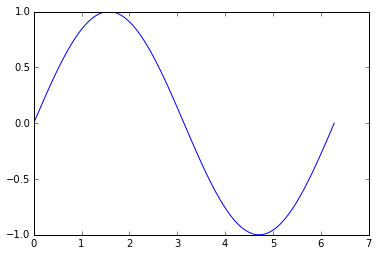

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.linspace(0, 2*np.pi, 100)
ys = np.sin(xs) # np.sin is a universal function
plt.plot(xs, ys);

## Generalized ufucns

A universal function performs vectorized looping over scalars. A generalized ufucn performs looping over vectors or arrays. Currently, numpy only ships with a single generalized ufunc. However, they play an important role for JIT compilation with `numba`, a topic we will cover in future lectures.

In [100]:
from numpy.core.umath_tests import matrix_multiply

print(matrix_multiply.signature)

(m,n),(n,p)->(m,p)


In [101]:
us = np.random.random((5, 2, 3)) # 5 2x3 matrics
vs = np.random.random((5, 3, 4)) # 5 3x4 matrices

In [102]:
us

array([[[ 0.1827915 ,  0.21665141,  0.34229298],
        [ 0.92644487,  0.52651505,  0.8697431 ]],

       [[ 0.0038839 ,  0.19720042,  0.28475788],
        [ 0.84489606,  0.23805655,  0.63112798]],

       [[ 0.71468457,  0.68654238,  0.53013627],
        [ 0.02834396,  0.77541363,  0.30340846]],

       [[ 0.92691205,  0.98658946,  0.69476718],
        [ 0.07400333,  0.67902102,  0.54904455]],

       [[ 0.36109089,  0.10082697,  0.83572606],
        [ 0.55099707,  0.30401836,  0.09447062]]])

In [103]:
vs

array([[[ 0.20196025,  0.52727352,  0.07123009,  0.08770427],
        [ 0.75380559,  0.68142357,  0.47357783,  0.82028371],
        [ 0.58988808,  0.13475718,  0.97363453,  0.14550922]],

       [[ 0.04486043,  0.88393991,  0.95438738,  0.4261083 ],
        [ 0.25971647,  0.90196183,  0.74372385,  0.41669333],
        [ 0.64175032,  0.88527642,  0.96175356,  0.03472552]],

       [[ 0.85733072,  0.67473724,  0.89955348,  0.59666636],
        [ 0.17460402,  0.07002726,  0.59576157,  0.60740013],
        [ 0.89199972,  0.53825943,  0.47654698,  0.49677322]],

       [[ 0.30298142,  0.30577747,  0.2669008 ,  0.91899729],
        [ 0.14612864,  0.77283817,  0.08769975,  0.83944812],
        [ 0.82350963,  0.26044541,  0.12303421,  0.57870493]],

       [[ 0.7520965 ,  0.2707108 ,  0.37770757,  0.71248137],
        [ 0.8206674 ,  0.48625597,  0.68672448,  0.3565277 ],
        [ 0.78355968,  0.91595299,  0.06235247,  0.8613835 ]]])

In [104]:
# perform matrix multiplication for each of the 5 sets of matrices
ws = matrix_multiply(us, vs) 

In [105]:
ws.shape

(5, 2, 4)

In [106]:
ws

array([[[ 0.40214421,  0.29013893,  0.44888982,  0.243554  ],
        [ 1.09704611,  0.96447374,  1.16214851,  0.63970053]],

       [[ 0.23413389,  0.43338982,  0.42423631,  0.09371542],
        [ 0.50475619,  1.52027799,  1.59039605,  0.48113005]],

       [[ 1.20547551,  0.81565182,  1.3045474 ,  1.10679168],
        [ 0.43033075,  0.23673728,  0.63204693,  0.63862342]],

       [[ 0.99715356,  1.22685174,  0.41939735,  2.08208553],
        [ 0.57378952,  0.69039805,  0.14685279,  0.95574657]],

       [[ 1.00916185,  0.91226471,  0.2577367 ,  1.01309878],
        [ 0.73792429,  0.38352225,  0.42278309,  0.58234155]]])